In [48]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_boston, load_diabetes, load_iris, load_digits

import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import binom 

Since the L binary classiﬁers are independent, and the binomial distribution is the distribution of number of successes in a sequence of independent experiments.
So the number of correct prediction in the aggregating model follows a binomial distribution.


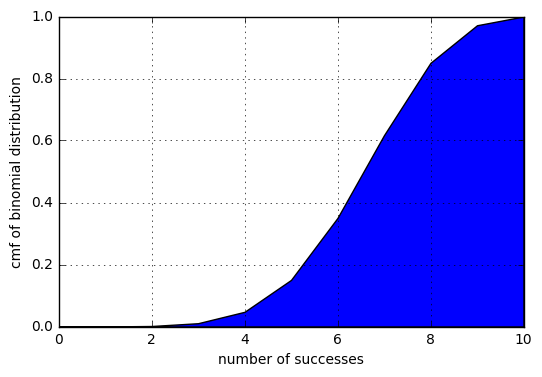

If the aggregating model gets more than L/2 successes within all classifiers, then we consider it gets the correct prection.
The probability of correct prediction for the aggregating models: 0.8497316674


In [46]:
# Math question : 
print("Since the L binary classiﬁers are independent, and the binomial distribution is the distribution of number of successes in a sequence of independent experiments.")
print("So the number of correct prediction in the aggregating model follows a binomial distribution.")
# Q1
# what is the probability of correct prediction for the aggregation of models?
L=10
p=0.7
rv = binom(L, p)
fig, ax = plt.subplots()
ax.fill_between(range(L+1), rv.cdf(range(L+1)),0)
ax.grid(True, zorder=5)
plt.xlabel('number of successes')
plt.ylabel('cmf of binomial distribution')
plt.show()
print("If the aggregating model gets more than L/2 successes within all classifiers, then we consider it gets the correct prection.")
print('The probability of correct prediction for the aggregating models:', 1-rv.cdf(5))

In [50]:
x=x_diabetes
y=y_diabetes
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/7, random_state=0)
model = LogisticRegression(C=50).fit(x_train, y_train)
print(model.score(x_test,y_test))


0.0


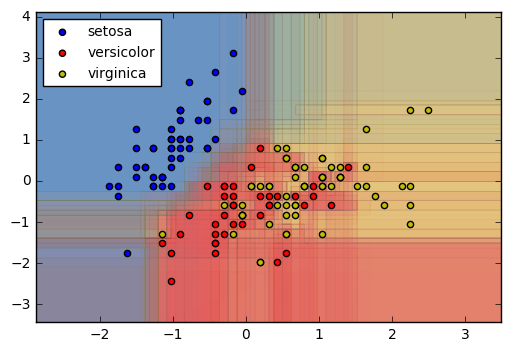

In [23]:
# Q7
# Using the data-set iris, limited to the first two variables/features, show the prediction probabilities
# for each class

# Parameters
n_estimators = 100
plot_colors = "bry"
plot_step = 0.02
# Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)
# RF fitting
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(X, y)
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
xxyy = np.c_[xx.reshape(xx.shape[0]*xx.shape[1]) , yy.reshape(yy.shape[0]*yy.shape[1]) ]
plt.figure()
# Z=np.zeros(len(xxyy))
# k=np.zeros(len(xxyy))
for tree in model.estimators_:
# TODO use predict to obtain the probabilities you will store in Z
    Z = tree.predict(xxyy)
#     k[results!=0]=0
#     k[results==0]=1
#     Z=Z+k
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
plt.clabel(cs, inline=1, fontsize=10)
plt.axis("tight")
# plt.show()
# Plot the training points
for i, c in zip(range(3), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],cmap=plt.cm.Paired)
plt.legend(scatterpoints=1,loc=2,fontsize=10)
plt.show()

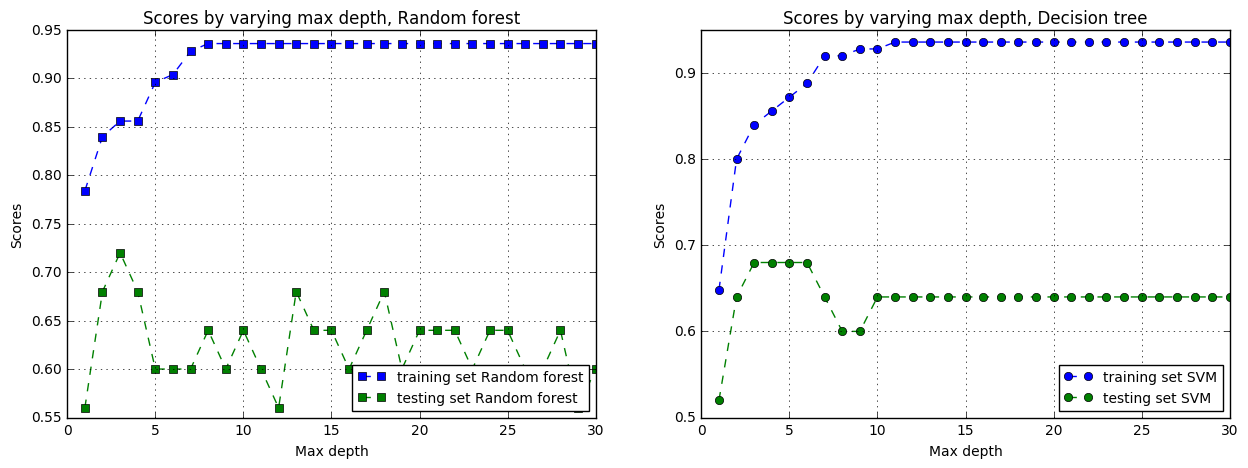

Even


In [68]:
# Q8

# iris, classification
x_iris_train, x_iris_test, y_iris_train, y_iris_test = train_test_split(x_iris, y_iris, test_size=1/6, random_state=0)
trainingscore_forest=list([])
testscore_forest=list([])
for max_depth in range(1,31):
    clf = RandomForestClassifier(n_estimators=100, max_depth=max_depth).fit(x_iris_train[:,0:2], y_iris_train)
    trainingscore_forest.append(clf.score(x_iris_train[:,0:2],y_iris_train))
    testscore_forest.append(clf.score(x_iris_test[:,0:2],y_iris_test))

trainingscore_SVM=list([])
testscore_SVM=list([])
for max_depth in range(1,31):
    clf = DecisionTreeClassifier( max_depth=max_depth).fit(x_iris_train[:,0:2], y_iris_train)
    trainingscore_SVM.append(clf.score(x_iris_train[:,0:2],y_iris_train))
    testscore_SVM.append(clf.score(x_iris_test[:,0:2],y_iris_test))

plt.figure(1,figsize=[15,5])
plt.subplot(1,2,1)
plt.plot(range(1,31), trainingscore_forest,  '--', marker='s',label='training set Random forest')
plt.plot(range(1,31), testscore_forest, '--', marker='s',label='testing set Random forest')
plt.xlabel('Max depth')
plt.ylabel('Scores')
plt.title('Scores by varying max depth, Random forest')
plt.legend(fontsize=10,loc=4)
plt.grid()

plt.subplot(1,2,2)
plt.plot(range(1,31), trainingscore_SVM,  '--', marker='o',label='training set SVM')
plt.plot(range(1,31), testscore_SVM, '--', marker='o',label='testing set SVM')
plt.xlabel('Max depth')
plt.ylabel('Scores')
plt.title('Scores by varying max depth, Decision tree')
plt.legend(fontsize=10,loc=4)
plt.grid()
plt.show()

print("Even")

In [2]:
# results.shape
# xxyy.shape
# len(xxyy)
# results = tree.predict(xxyy)
# results[results!=0]=0
# results[results==0]=1
# results.shape
# np.zeros(len(xxyy)).shape
# plt.plot(Z)
# plt.show()

[1,3,2][1]

3